In [1]:
import pandas as pd
import numpy as np

In [2]:
#Visualization Libraries:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
sns.set(style="darkgrid")

In [3]:
#Scikit-model requisites:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
# Get Features from the Dataset:
with open("/content/HAPT Dataset/features.txt", "r") as _: 
  features = [x.strip().replace('()', '').replace(',', '').split(' ')[-1] for x in _.readlines()]
print("Number of Features:", len(features))
print("Features:\n",features[:5])

Number of Features: 561
Features:
 ['tBodyAcc-Mean-1', 'tBodyAcc-Mean-2', 'tBodyAcc-Mean-3', 'tBodyAcc-STD-1', 'tBodyAcc-STD-2']


**Training Data**

In [9]:
#Participant IDs:
with open('/content/HAPT Dataset/Train/subject_id_train.txt', 'r') as _: 
  train_id = pd.Series([int(x.strip()) for x in _.readlines()])

In [10]:
#Activity Labels:
with open('/content/HAPT Dataset/Train/y_train.txt', 'r') as _: 
  y_train = pd.Series([int(x.strip()) for x in _.readlines()])
y_train.value_counts().sort_index()

1     1226
2     1073
3      987
4     1293
5     1423
6     1413
7       47
8       23
9       75
10      60
11      90
12      57
dtype: int64

In [13]:
#Creating the Train Dataframe: 
X_train = pd.read_csv('/content/HAPT Dataset/Train/X_train.txt', sep=" ", header=None)
X_train.columns = features
X_train

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,tBodyAcc-Max-2,tBodyAcc-Max-3,tBodyAcc-Min-1,tBodyAcc-Min-2,tBodyAcc-Min-3,tBodyAcc-SMA-1,tBodyAcc-Energy-1,tBodyAcc-Energy-2,tBodyAcc-Energy-3,tBodyAcc-IQR-1,tBodyAcc-IQR-2,tBodyAcc-IQR-3,tBodyAcc-ropy-1,tBodyAcc-ropy-1,tBodyAcc-ropy-1,tBodyAcc-ARCoeff-1,tBodyAcc-ARCoeff-2,tBodyAcc-ARCoeff-3,tBodyAcc-ARCoeff-4,tBodyAcc-ARCoeff-5,tBodyAcc-ARCoeff-6,tBodyAcc-ARCoeff-7,tBodyAcc-ARCoeff-8,tBodyAcc-ARCoeff-9,tBodyAcc-ARCoeff-10,tBodyAcc-ARCoeff-11,tBodyAcc-ARCoeff-12,tBodyAcc-Correlation-1,tBodyAcc-Correlation-2,tBodyAcc-Correlation-3,...,fBodyAccJerkMag-Energy-1,fBodyAccJerkMag-IQR-1,fBodyAccJerkMag-ropy-1,fBodyAccJerkMag-MaxInds-1,fBodyAccJerkMag-MeanFreq-1,fBodyAccJerkMag-Skewness-1,fBodyAccJerkMag-Kurtosis-1,fBodyGyroMag-Mean-1,fBodyGyroMag-STD-1,fBodyGyroMag-Mad-1,fBodyGyroMag-Max-1,fBodyGyroMag-Min-1,fBodyGyroMag-SMA-1,fBodyGyroMag-Energy-1,fBodyGyroMag-IQR-1,fBodyGyroMag-ropy-1,fBodyGyroMag-MaxInds-1,fBodyGyroMag-MeanFreq-1,fBodyGyroMag-Skewness-1,fBodyGyroMag-Kurtosis-1,fBodyGyroJerkMag-Mean-1,fBodyGyroJerkMag-STD-1,fBodyGyroJerkMag-Mad-1,fBodyGyroJerkMag-Max-1,fBodyGyroJerkMag-Min-1,fBodyGyroJerkMag-SMA-1,fBodyGyroJerkMag-Energy-1,fBodyGyroJerkMag-IQR-1,fBodyGyroJerkMag-ropy-1,fBodyGyroJerkMag-MaxInds-1,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,-0.744893,-0.648447,0.841796,0.708440,0.651716,-0.975752,-0.999950,-0.999888,-0.998014,-0.993999,-0.991980,-0.970970,-0.547095,-0.700974,-0.622697,0.921884,-0.719483,0.342168,-0.161318,0.266049,-0.274351,0.267205,-0.020958,0.382610,-0.501748,0.512463,-0.206337,0.376778,0.435172,0.660199,...,-0.999918,-0.991736,-1.000000,-0.936508,0.349260,-0.517127,-0.801006,-0.980135,-0.961301,-0.974129,-0.956013,-0.989894,-0.980135,-0.999240,-0.992673,-0.701291,-1.000000,-0.132480,0.565697,0.363478,-0.991994,-0.990877,-0.990169,-0.992521,-0.991044,-0.991994,-0.999937,-0.990537,-0.871306,-1.000000,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,-0.736338,-0.712415,0.838758,0.708440,0.659340,-0.987427,-0.999993,-0.999826,-0.999411,-0.998918,-0.985482,-0.973481,-0.781973,-0.534604,-0.593165,0.607435,-0.266783,0.275882,0.200417,0.131266,-0.149017,0.292436,-0.192986,0.217496,-0.089175,0.059909,-0.236609,-0.012696,-0.072711,0.578649,...,-0.999867,-0.991506,-1.000000,-0.841270,0.533688,-0.625993,-0.898311,-0.988296,-0.983313,-0.982951,-0.987406,-0.992134,-0.988296,-0.999811,-0.993996,-0.720683,-0.948718,-0.268979,-0.364219,-0.723724,-0.995857,-0.996580,-0.995671,-0.996939,-0.994436,-0.995857,-0.999981,-0.994623,-1.000000,-1.000000,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,-0.736338,-0.712415,0.834002,0.705008,0.674551,-0.988528,-0.999972,-0.999719,-0.999803,-0.996898,-0.976781,-0.986754,-0.688176,-0.520514,-0.593165,0.272262,-0.056424,0.322283,-0.273292,0.037180,-0.133612,0.332487,-0.240491,0.348733,-0.195409,0.229436,-0.316816,-0.123889,-0.181137,0.608219,...,-0.999845,-0.987029,-1.000000,-0.904762,0.661975,-0.725887,-0.926663,-0.989255,-0.986019,-0.984533,-0.991701,-0.995857,-0.989255,-0.999854,-0.993256,-0.736521,-0.794872,-0.212429,-0.564868,-0.874594,-0.995034,-0.995308,-0.994868,-0.996133,-0.995863,-0.995034,-0.999973,-0.993834,-1.000000,-0.555556,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.80

In [14]:
#Finding Shape of the Tarin Dataframe:
X_train.shape

(7767, 561)

In [15]:
#Finding the Datatype of the Train Dataframe:
X_train.dtypes

tBodyAcc-Mean-1                    float64
tBodyAcc-Mean-2                    float64
tBodyAcc-Mean-3                    float64
tBodyAcc-STD-1                     float64
tBodyAcc-STD-2                     float64
                                    ...   
tBodyGyro-AngleWRTGravity-1        float64
tBodyGyroJerk-AngleWRTGravity-1    float64
tXAxisAcc-AngleWRTGravity-1        float64
tYAxisAcc-AngleWRTGravity-1        float64
tZAxisAcc-AngleWRTGravity-1        float64
Length: 561, dtype: object

**Test Data**

In [16]:
#Participant IDs:
with open('/content/HAPT Dataset/Test/subject_id_test.txt', 'r') as _: 
  test_id = pd.Series([int(x.strip()) for x in _.readlines()])

In [18]:
#Activity Labels:
with open('/content/HAPT Dataset/Test/y_test.txt', 'r') as _: 
  y_test = pd.Series([int(x.strip()) for x in _.readlines()])

y_test.value_counts().sort_index()

1     496
2     471
3     420
4     508
5     556
6     545
7      23
8      10
9      32
10     25
11     49
12     27
dtype: int64

In [20]:
#Creating the Test Dataframe:
X_test = pd.read_csv('/content/HAPT Dataset/Test/X_test.txt', sep=" ", header=None)
X_test.columns = features
X_test

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,tBodyAcc-Max-2,tBodyAcc-Max-3,tBodyAcc-Min-1,tBodyAcc-Min-2,tBodyAcc-Min-3,tBodyAcc-SMA-1,tBodyAcc-Energy-1,tBodyAcc-Energy-2,tBodyAcc-Energy-3,tBodyAcc-IQR-1,tBodyAcc-IQR-2,tBodyAcc-IQR-3,tBodyAcc-ropy-1,tBodyAcc-ropy-1,tBodyAcc-ropy-1,tBodyAcc-ARCoeff-1,tBodyAcc-ARCoeff-2,tBodyAcc-ARCoeff-3,tBodyAcc-ARCoeff-4,tBodyAcc-ARCoeff-5,tBodyAcc-ARCoeff-6,tBodyAcc-ARCoeff-7,tBodyAcc-ARCoeff-8,tBodyAcc-ARCoeff-9,tBodyAcc-ARCoeff-10,tBodyAcc-ARCoeff-11,tBodyAcc-ARCoeff-12,tBodyAcc-Correlation-1,tBodyAcc-Correlation-2,tBodyAcc-Correlation-3,...,fBodyAccJerkMag-Energy-1,fBodyAccJerkMag-IQR-1,fBodyAccJerkMag-ropy-1,fBodyAccJerkMag-MaxInds-1,fBodyAccJerkMag-MeanFreq-1,fBodyAccJerkMag-Skewness-1,fBodyAccJerkMag-Kurtosis-1,fBodyGyroMag-Mean-1,fBodyGyroMag-STD-1,fBodyGyroMag-Mad-1,fBodyGyroMag-Max-1,fBodyGyroMag-Min-1,fBodyGyroMag-SMA-1,fBodyGyroMag-Energy-1,fBodyGyroMag-IQR-1,fBodyGyroMag-ropy-1,fBodyGyroMag-MaxInds-1,fBodyGyroMag-MeanFreq-1,fBodyGyroMag-Skewness-1,fBodyGyroMag-Kurtosis-1,fBodyGyroJerkMag-Mean-1,fBodyGyroJerkMag-STD-1,fBodyGyroJerkMag-Mad-1,fBodyGyroJerkMag-Max-1,fBodyGyroJerkMag-Min-1,fBodyGyroJerkMag-SMA-1,fBodyGyroJerkMag-Energy-1,fBodyGyroJerkMag-IQR-1,fBodyGyroJerkMag-ropy-1,fBodyGyroJerkMag-MaxInds-1,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,0.030914,-0.008927,0.040382,-0.938504,-0.944626,-0.759334,-0.952398,-0.950281,-0.802483,-0.757099,-0.733398,-0.407960,0.728511,0.658266,0.629169,-0.913306,-0.997966,-0.998683,-0.975818,-0.975440,-0.966793,-0.914396,-0.363822,-0.420897,0.181772,0.517928,-0.403636,0.449325,-0.147545,0.223150,-0.190143,0.155899,0.054035,0.053156,-0.000037,-0.077888,0.028585,0.077659,-0.490616,-0.711964,...,-0.993471,-0.921836,-0.484619,-1.000000,-0.031754,-0.255114,-0.698671,-0.770610,-0.797105,-0.769223,-0.834266,-0.940359,-0.770610,-0.970958,-0.798403,0.179435,-1.000000,-0.054576,-0.496820,-0.764755,-0.890169,-0.907480,-0.895518,-0.917953,-0.909825,-0.890169,-0.994105,-0.898097,-0.234815,-1.000000,0.122830,-0.345684,-0.709087,0.006462,0.162920,-0.825886,0.271151,-0.720559,0.276779,-0.051074
1,0.042548,0.001079,-0.026236,-0.975516,-0.977502,-0.960146,-0.986694,-0.978983,-0.966820,-0.757099,-0.733398,-0.701699,0.770927,0.706301,0.635732,-0.978295,-0.999618,-0.999708,-0.999158,-0.993775,-0.982664,-0.974733,-0.466563,-0.392219,-0.435565,0.504355,-0.117122,0.062621,0.188184,0.209414,-0.245994,0.390254,-0.247800,0.210276,-0.146806,0.106145,-0.022423,-0.104187,-0.429196,0.398133,...,-0.997610,-0.957543,-0.723642,-1.000000,-0.486025,-0.216243,-0.664383,-0.924461,-0.916766,-0.920964,-0.924413,-0.991454,-0.924461,-0.995727,-0.933145,-0.218860,-1.000000,-0.039379,-0.116580,-0.467260,-0.951981,-0.938387,-0.938230,-0.949994,-0.986899,-0.951981,-0.998272,-0.951332,-0.431053,-1.000000,-0.314688,-0.142804,-0.600867,-0.083495,0.017500,-0.434375,0.920593,-0.698684,0.281322,-0.076825
2,0.038297,-0.011660,-0.025643,-0.993922,-0.979215,-0.973030,-0.994298,-0.980535,-0.977508,-0.799005,-0.745911,-0.695737,0.837921,0.690520,0.659163,-0.983764,-0.999959,-0.999645,-0.999527,-0.993224,-0.983084,-0.981887,-0.707815,-0.716036,-0.560652,0.241698,-0.081234,0.055641,0.103205,0.009404,-0.123180,0.439879,-0.402218,0.305289,-0.284243,0.637201,-0.572356,0.306166,-0.323897,0.278536,...,-0.999269,-0.978591,-0.898000,-1.000000,0.143718,-0.206895,-0.638213,-0.975209,-0.973990,-0.967707,-0.984206,-0.997741,-0.975209,-0.999504,-0.968278,-0.561266,-0.897436,-0.170494,-0.692859,-0.927681,-0.985692,-0.983452,-0.983649,-0.986930,-0.989605,-0.985692,-0.999831,-0.986227,-0.809976,-0.936508,0.114730,-0.209525,-0.645500,-0.034956,0.202302,0.064103,0.14506

In [21]:
#Finding Shape of the Test Dataframe:
X_test.shape

(3162, 561)

In [22]:
#Finding Datatypes of the Test Dataframe:
X_test.dtypes

tBodyAcc-Mean-1                    float64
tBodyAcc-Mean-2                    float64
tBodyAcc-Mean-3                    float64
tBodyAcc-STD-1                     float64
tBodyAcc-STD-2                     float64
                                    ...   
tBodyGyro-AngleWRTGravity-1        float64
tBodyGyroJerk-AngleWRTGravity-1    float64
tXAxisAcc-AngleWRTGravity-1        float64
tYAxisAcc-AngleWRTGravity-1        float64
tZAxisAcc-AngleWRTGravity-1        float64
Length: 561, dtype: object

We implement the following 3 ML Algorithms on the Dataset:

1. **LOGISTIC REGRESSION**
2. **K-NEAREST NEIGHBOURS**
3. **SVM**

And compare the output accuracies of these algorithms.



***Algorithm 1:***

**LOGISTIC REGRESSION**

In [23]:
LR = LogisticRegression()

In [74]:
#K-fold CV 
"K-value is substiuited by 10, 20 and 30 after a complete run of the code"
accuraccies = cross_val_score(estimator = LR, X= X_train, y=y_train, cv=30)   
print("Average Accuracies: ",100*np.mean(accuraccies))
print("Standard Deviation Accuracies: ",100*np.std(accuraccies))

Average Accuracies:  95.82921792224118
Standard Deviation Accuracies:  2.8164460759546666


In [76]:
LR.fit(X_train,y_train) #Learning Stage
#Prediction Stage:
print("LR Score: {}".format(100*LR.score(X_test,y_test))) 
LRscore = LR.score(X_test,y_test)

LR Score: 93.89626818469323


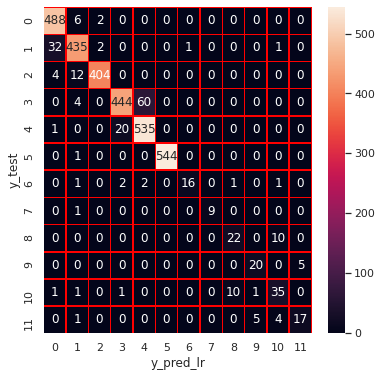

In [75]:
#Confusion Matrix:
y_pred_lr= LR.predict(X_test)
CM = confusion_matrix(y_test,y_pred_lr)

f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_lr")
plt.ylabel("y_test")
plt.show()

***Algorithm 2:***

**K-NEAREST NEIGHBOURS**

In [78]:
KNN = KNeighborsClassifier(n_neighbors = 30) #"K-value is substiuited by 10, 20 and 30 after a complete run of the code"

In [77]:
#K-fold CV
"K-value is substiuited by 10, 20 and 30 after a complete run of the code"
accuraccies = cross_val_score(estimator = KNN, X= X_train, y=y_train, cv=30)
print("Average Accuracies: ",100*np.mean(accuraccies))
print("Standard Deviation Accuracies: ",100*np.std(accuraccies))

Average Accuracies:  91.91573633434099
Standard Deviation Accuracies:  3.896617316349285


In [ ]:
#Learning Stage:
KNN.fit(X_train,y_train)

#Prediction Stage:
prediction = KNN.predict(X_test)
print("{}-NN Score: {}".format(30,100*KNN.score(X_test,y_test)))
KNNscore = KNN.score(X_test,y_test)

In [ ]:
#Confusion Matrix:
y_pred_knn= KNN.predict(X_test)
CM = confusion_matrix(y_test,y_pred_knn)

f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_knn")
plt.ylabel("y_test")
plt.show()

***Algorithm 3:***

**SUPPORT VECTOR MACHINES**

In [57]:
SVM = SVC(random_state=42)

In [70]:
#K-fold CV
"K-value is substiuited by 10, 20 and 30 after a complete run of the code"
accuraccies = cross_val_score(estimator = SVM, X= X_train, y=y_train, cv=30)
print("Average Accuracies: ",100*np.mean(accuraccies))
print("Standart Deviation Accuracies: ",100*np.std(accuraccies))

Average Accuracies:  94.77352768050442
Standart Deviation Accuracies:  4.173446610891643


In [71]:
#Learning Stage:
SVM.fit(X_train,y_train)  

#Prediction Stage:
print("SVM Score:", 100*SVM.score(X_test,y_test))
SVMscore = SVM.score(X_test,y_test)

SVM Score: 93.67488931056293


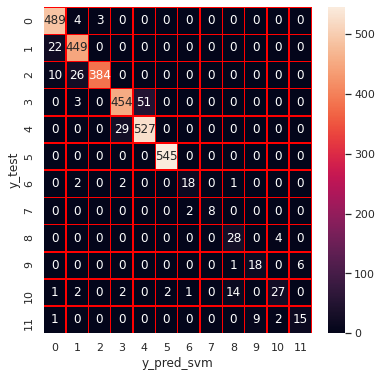

In [72]:
#Confusion Matrix:
y_pred_svm= SVM.predict(X_test)
CM = confusion_matrix(y_test,y_pred_svm)

f, ax = plt.subplots(figsize=(6,6))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred_svm")
plt.ylabel("y_test")
plt.show()

***Model Comparisions:***

Models are compared on the basis of their **f1-score**.

In [73]:
#Model Comaparision:
data = [['Logistic Regression',f1_score(y_test, y_pred_lr, average='weighted')],
        ['K-Nearest Neighbors Algorithm (K-NN)',f1_score(y_test, y_pred_knn, average='weighted')],
        ['Support Vector Machines (SVM)',f1_score(y_test, y_pred_svm, average='weighted')]]

F1_Score = pd.DataFrame(data, columns = ['Ml Algorithms', 'f1_score'])
F1_Score.sort_values(by = 'f1_score', ascending=0)

,Ml Algorithms,f1_score
0,Logistic Regression,0.938662
2,Support Vector Machines (SVM),0.936055
1,K-Nearest Neighbors Algorithm (K-NN),0.885910


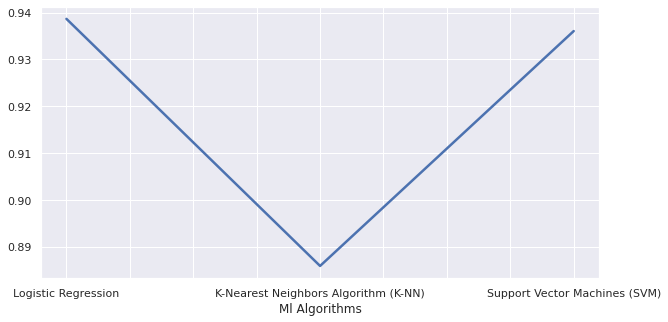

In [64]:
#Comparative Plot of f1-scores:
F1_Score.set_index('Ml Algorithms')['f1_score'].plot(figsize=(10, 5), linewidth=2.5)         

In [ ]:
#Author: Shirshakk Purkayastha
#18247